# Library Imports  

In [29]:
# Imports
import os
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('svg') deprecated 

# %config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib as matplotlib
import math
from matplotlib import animation, rc
from IPython.display import HTML
from pandas import DataFrame
from numpy import genfromtxt
from IPython.display import display

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16 
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 14
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

# Basic Line Plot Example

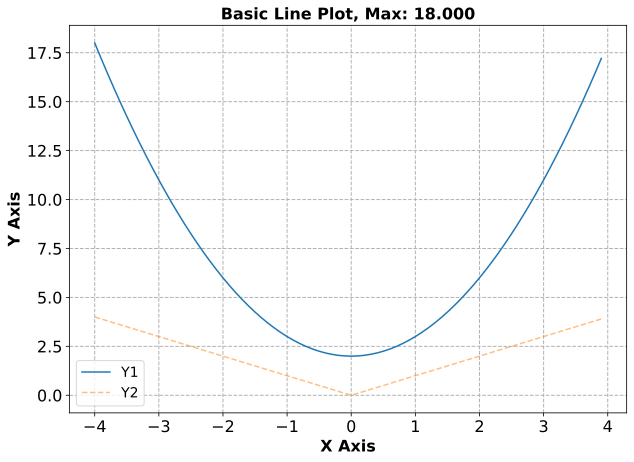

In [30]:
# Define some data 
x = np.arange(-4,4,0.1)
y1 = x**2 + 2
y2 = np.abs(x)

# Basic Line Plot 
figs,ax1 = plt.subplots()
ax1.plot(x,y1,color='C0')
ax1.plot(x,y2,color='C1',linestyle='--',alpha=0.5)
ax1.grid(color='0.7', linestyle='--', linewidth=1)
plt.ylabel('Y Axis')
plt.xlabel('X Axis')
plt.title('Basic Line Plot, Max: %3.3f'%(np.max(y1)))
plt.legend(['Y1','Y2'])
figs.set_size_inches(10,7)
if not os.path.exists('./Export'): # ensure export folder exists
    os.makedirs('./Export')
plt.savefig('./Export/BasicPlot.svg')

# Basic Pie Chart

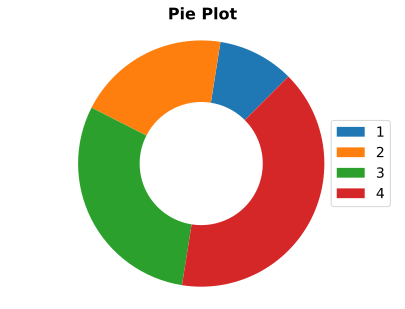

In [31]:
z = [1,2,3,4]
labels = ['1','2','3','4']
the_fig, ax1 = plt.subplots()
plt.pie(z,startangle=45,wedgeprops=dict(width=0.5))
plt.title('Pie Plot')
plt.legend(labels, loc="center right")
the_fig.set_size_inches(7,5)
plt.gca().axis("equal")
plt.savefig('Export/BasicPie.svg')


# Pretty Pie Chart

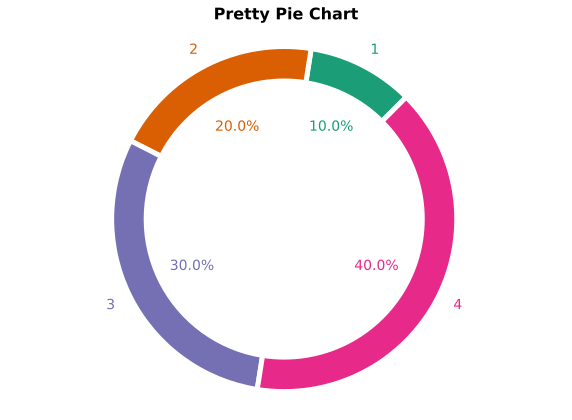

In [32]:
pie_fig, ax1 = plt.subplots()
ax1.prop_cycle = plt.cycler("color", plt.cm.Dark2.colors)
pies, texts,auto_txt = plt.pie(z,startangle=45,wedgeprops={'width':0.2,'linewidth': 5,'linestyle': 'solid',"edgecolor":"w"},
                   colors=plt.cm.Dark2.colors,autopct='%1.1f%%',labels=labels)
plt.title('Pretty Pie Chart')
plt.gca().axis("equal")
for i in range(len(texts)):
    texts[i].set_color(plt.cm.Dark2.colors[i])
    texts[i].set_size(14)
    auto_txt[i].set_color(plt.cm.Dark2.colors[i])
    auto_txt[i].set_size(14)
pie_fig.set_size_inches(10,7)
plt.savefig('Export/PrettyPie.svg')

# Bar Chart 

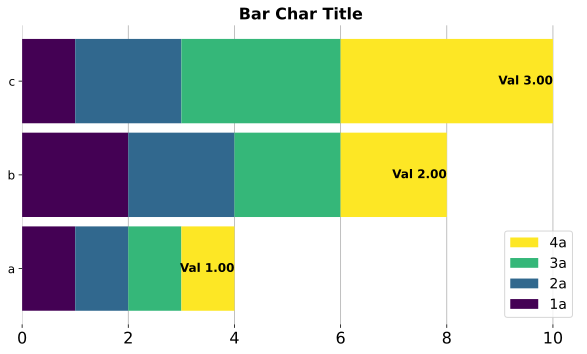

<Figure size 640x480 with 0 Axes>

In [33]:

data = np.block([[1,1,1,1],[2,2,2,2],[1,2,3,4]]).T 
labels = ['a','b','c']
label2 = ['1a','2a','3a','4a']

fig_bars = plt.figure(figsize=(10,7))
ax = fig_bars.add_subplot(111)
colors = np.array(plt.cm.viridis.colors)[(np.arange(0,len(z))*(255/(len(z)-1))).astype(int),:]
y_pos = np.arange(len(labels))

patch_handles = []
left = np.zeros(len(labels)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left,label=label2[i],height=0.9))
    # accumulate the left-hand offsets
    left += d

for i, patch in enumerate(patch_handles[np.shape(data)[0]-1].get_children()):
    bl = patch.get_xy()
    x = 1*patch.get_width() + bl[0]
    y = 0.5*patch.get_height() + bl[1]
    ax.text(x,y, "Val %2.2f" % (z[i]), size=12, weight=600, ha='right',va='center')

ax.tick_params(axis='x')
ax.tick_params(axis='y', labelsize=12)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
plt.title('Bar Char Title')
plt.box(False)
#plt.legend(loc='upper center',fancybox=True,ncol=5,bbox_to_anchor=(0.5, -0.05))
plt.legend(loc='upper center',fancybox=True,ncol=3,bbox_to_anchor=(0.5, -0.05))
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

fig_bars.set_size_inches(10,6)

plt.show()
plt.savefig('Export/PrettyBar.svg')


# Scatter

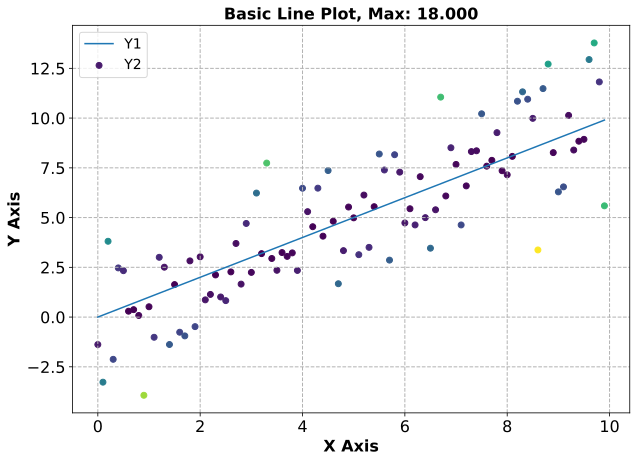

In [34]:
x = np.block([np.arange(0,10,0.1)])
y11 = x;
y1h = y11 + 2*np.random.randn(len(x))
error = (y11 - y1h)**2

figs,ax1 = plt.subplots()
ax1.plot(x,y11)
ax1.scatter(x,y1h,c=error)
ax1.grid(color='0.7', linestyle='--', linewidth=1)
plt.ylabel('Y Axis')
plt.xlabel('X Axis')
plt.title('Basic Line Plot, Max: %3.3f'%(np.max(y1)))
plt.legend(['Y1','Y2'])
figs.set_size_inches(10,7)

# Ploty Examples: 
Note these won't render in an offline environment or in jupyter lab 

In [35]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

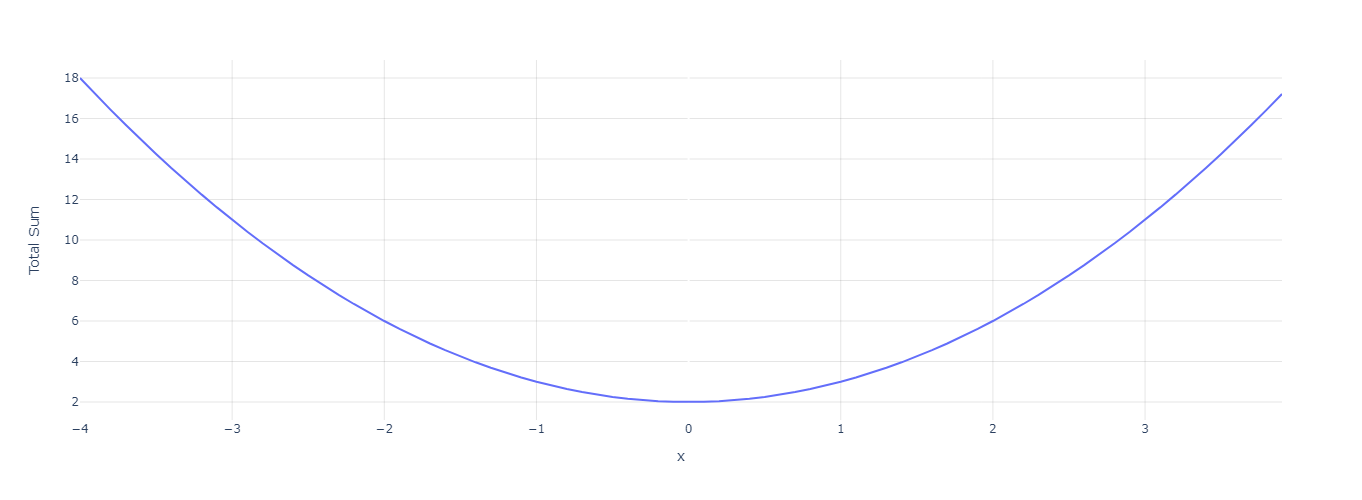

In [36]:
x = np.arange(-4,4,0.1)
y1 = x**2 + 2
y2 = 3*x**2+5
fig_p = px.line(x=x,y=y1,height=500)
#fig_p.add_trace(px.line(x=x,y=y2))
fig_p.update_layout(
  plot_bgcolor='rgba(0,0,0,0)',
  yaxis_gridcolor="rgba(0,0,0,0.1)",
  xaxis_gridcolor="rgba(0,0,0,0.1)",
  yaxis_title='Total Sum')
fig_p.show()